# Risk factor of Heart Disease

Domain : Healthcare


 ### Details :
 
 In Framingham Heart Study identify risk factors of the heart disease among the population in community of Framingham and their effects on the dataset.
 The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:
 
- gender :The variable is a binary named “male” means 0 and "female" means 1 in the dataset.
- age : Age at the time of medical examination in years.
- education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- currentSmoker: Current cigarette smoking at the time of examinations
- cigsPerDay: Number of cigarettes smoked each day
- BPmeds: Use of Anti-hypertensive medication at exam
- prevalentStroke: Prevalent Stroke (0 = free of disease)
- prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- diabetes: Diabetic according to criteria of first exam treated
- totChol: Total cholesterol (mg/dL)
- sysBP: Systolic Blood Pressure (mmHg)
- diaBP: Diastolic blood pressure (mmHg)
- BMI: Body Mass Index, weight (kg)/height (m)^2
- heartRate: Heart rate (beats/minute)
- glucose: Blood glucose level (mg/dL)

 And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).




**Objective :**
 - The aim is to visualize the dataset and make predictive models.

In [7]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [8]:
#Reading the Dataset

df = pd.read_csv('framingham.csv')
df

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [9]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


In [10]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
#Examining Null values in each feature

df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
df.drop('education', axis=1, inplace=True)

In [13]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(method = 'ffill')
df['BPMeds'] = df['BPMeds'].fillna(method = 'ffill')
df['totChol'] = df['totChol'].fillna(method = 'ffill')
df['BMI'] = df['BMI'].fillna(method = 'ffill')
df['heartRate'] = df['heartRate'].fillna(method = 'ffill')
df['glucose'] = df['glucose'].fillna(method = 'ffill')

In [14]:
#Rechecking if we have any missing value left

df.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

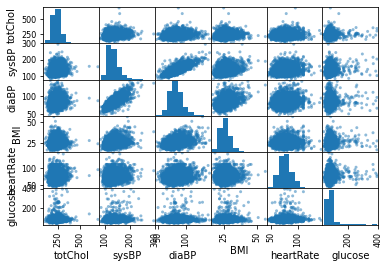

<Figure size 720x720 with 0 Axes>

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.loc[:,'totChol': 'glucose'])
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot:>

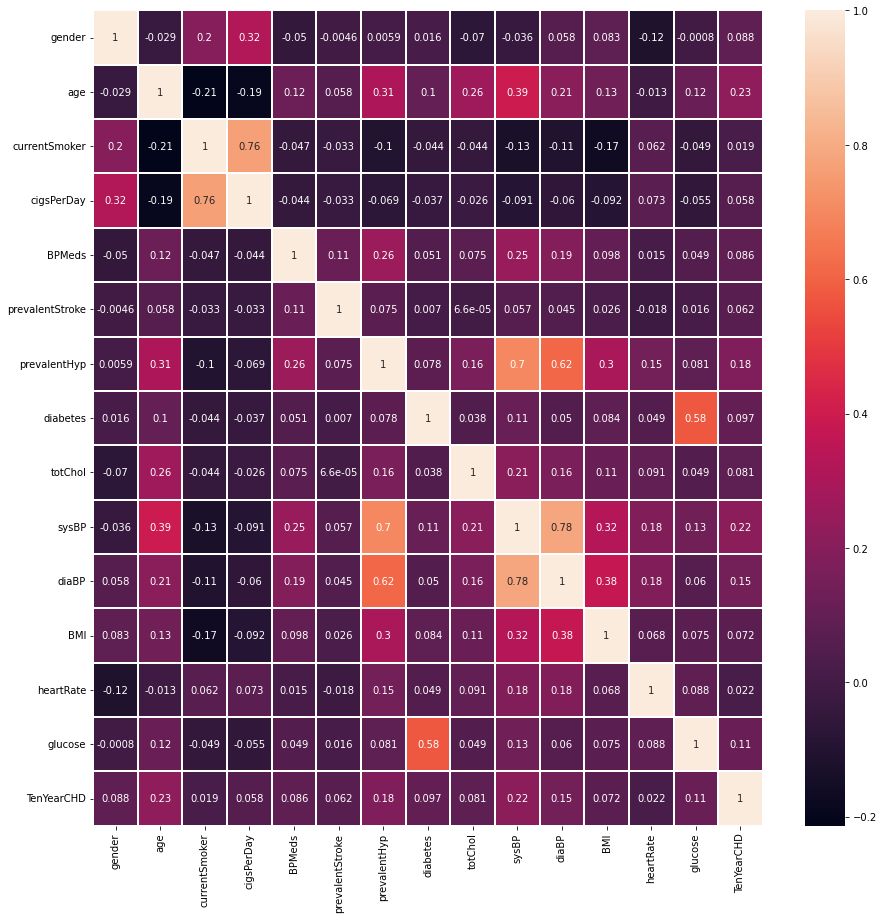

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

From scatter_matrix and heatmap we see that sysBP and diaBP are highly correlated

And currentSmoker and cigsPerDay are highly correlated

In [17]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

df.drop(features_to_drop, axis=1, inplace=True)

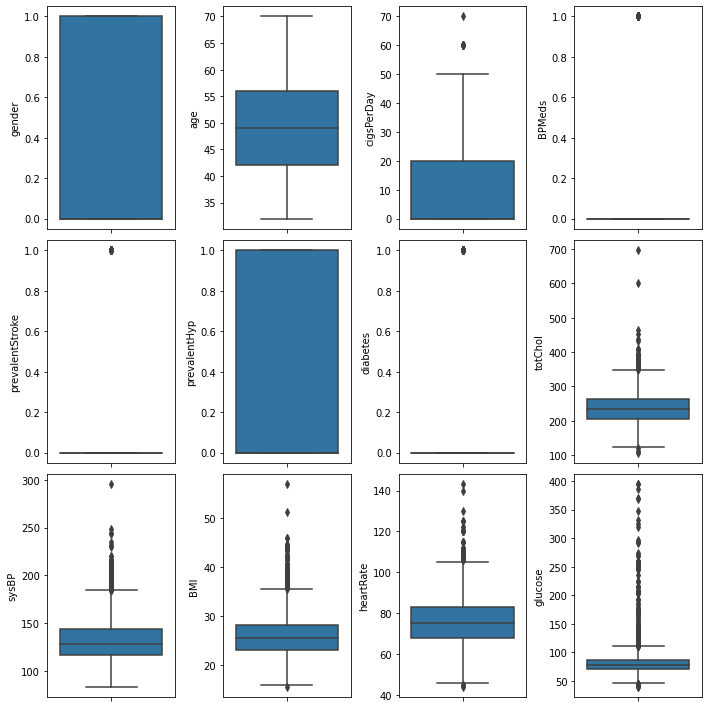

In [18]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [19]:
# using IQR method handle outliers
for x in ['totChol']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['sysBP']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['BMI']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['heartRate']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
for x in ['glucose']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan



In [20]:
df.isnull().sum()

gender               0
age                  0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             58
sysBP              126
BMI                 97
heartRate           76
glucose            207
TenYearCHD           0
dtype: int64

In [21]:
# delete outliers
df = df.dropna(axis = 0)

In [22]:
df.isnull().sum()

gender             0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
df.shape

(3742, 13)

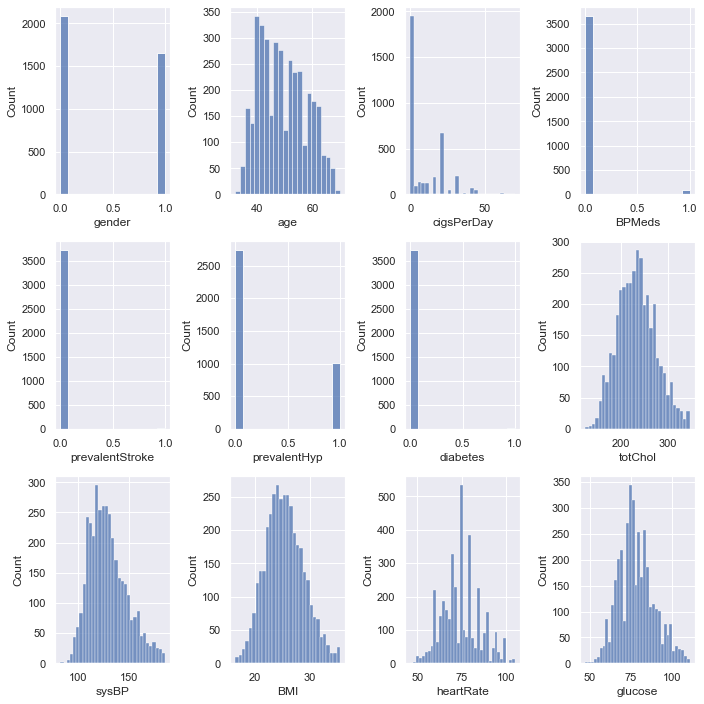

In [88]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df.items():
    sns.histplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [25]:
df.describe()

,gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
count,3742.000000,3742.00000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,0.441742,49.10930,9.237306,0.021913,0.004810,0.269642,0.006948,234.216195,129.339123,25.423613,74.814003,78.356494,0.136024
std,0.496661,8.47706,12.041864,0.146420,0.069198,0.443833,0.083077,40.518684,18.301549,3.492878,10.883905,10.951211,0.342859
min,0.000000,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,16.480000,46.000000,47.000000,0.000000
25%,0.000000,42.00000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,22.932500,67.000000,71.000000,0.000000
50%,0.000000,48.00000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,25.195000,75.000000,77.000000,0.000000
75%,1.000000,56.00000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,140.000000,27.757500,80.000000,85.000000,0.000000
max,1.000000,70.00000,70.000000,1.000000,1.000000,1.000000,1.000000,347.000000,184.500000,35.450000,105.000000,111.000000,1.000000


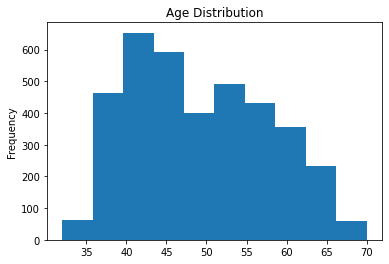

In [26]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [27]:
feature=['totChol','sysBP','BMI','heartRate','glucose','cigsPerDay']
list(enumerate(feature))

[(0, 'totChol'),
 (1, 'sysBP'),
 (2, 'BMI'),
 (3, 'heartRate'),
 (4, 'glucose'),
 (5, 'cigsPerDay')]

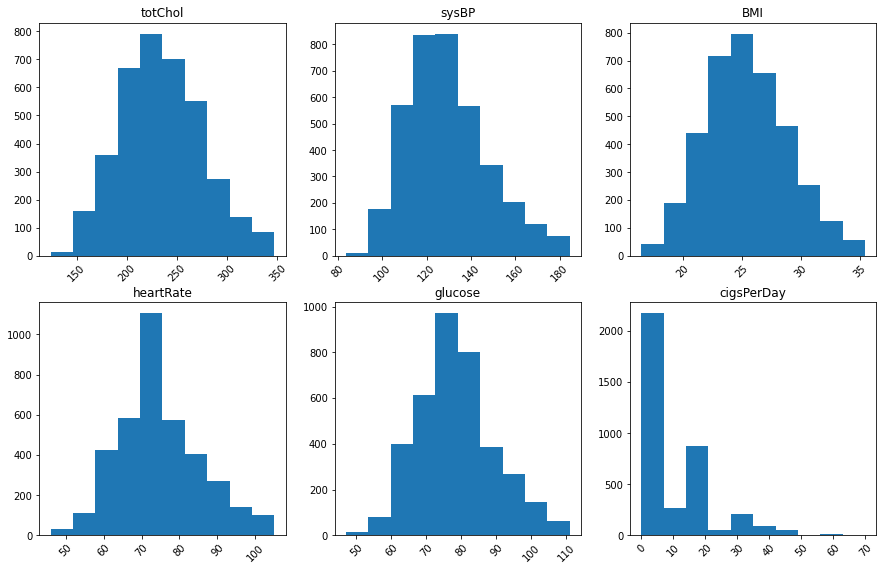

In [28]:
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(6,3,i[0]+1)
    plt.hist(i[1],data=df)
    plt.xticks(rotation=45)
    plt.title(i[1])
plt.show()

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

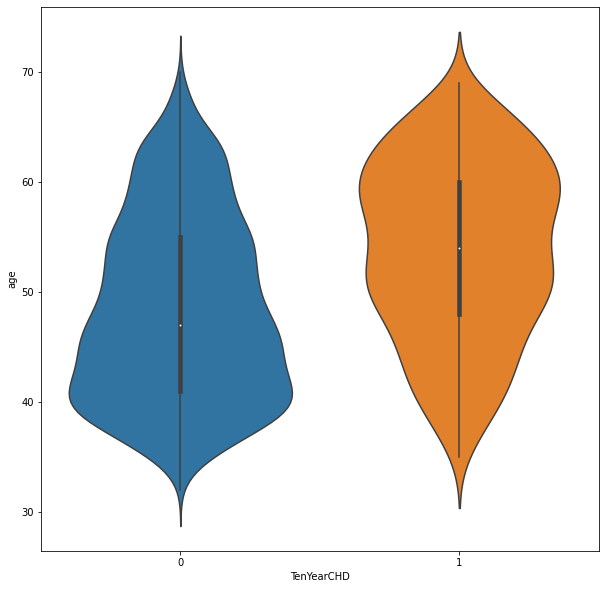

In [29]:
# age vs CHD

plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df)

Violinplot tells that most patients of age around 40-55 have 0 risk

Most patients of age around 60-65 have risk of disease (CHD)

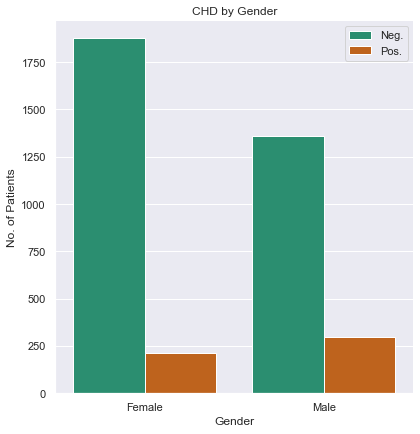

In [89]:

#CHD by Gender Viz.

sns.catplot(x='gender', hue='TenYearCHD', data=df, kind='count', palette='Dark2', height=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')
plt.show()

In [32]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [33]:
mod =ols('gender~TenYearCHD',data=df).fit()
sm.stats.anova_lm(mod,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
TenYearCHD,1.0,11.191141,11.191141,45.913194,1.430148e-11
Residual,3740.0,911.608699,0.243746,NaN,NaN


In [92]:
#User-defined function

#Age encoding
def e_age(data):
    if data <= 40:# Adults
        return 0
    if data > 40 and data <=55:# Middle Aged Adults
        return 1
    else:
        return 2  # senior

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2


#applying functions

df['h1'] = df['heartRate'].apply(heartrate_enc)
df['e1_age'] = df['age'].apply(lambda x : e_age(x))

C:\Users\Pooja\AppData\Local\Temp\ipykernel_12492\275851982.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pooja\AppData\Local\Temp\ipykernel_12492\275851982.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df['h1'].unique()

array([1, 0, 2], dtype=int64)

In [94]:
mod =ols('h1~TenYearCHD',data=df).fit()
sm.stats.anova_lm(mod,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
TenYearCHD,1.0,0.068914,0.068914,0.650667,0.419926
Residual,3740.0,396.113876,0.105913,NaN,NaN


In [95]:
df['e1_age'].unique()

array([0, 1, 2], dtype=int64)

In [96]:
mod =ols('e1_age~TenYearCHD',data=df).fit()
sm.stats.anova_lm(mod,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
TenYearCHD,1.0,60.376680,60.376680,143.203061,2.058357e-32
Residual,3740.0,1576.843256,0.421616,NaN,NaN


C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Count by Age Group')

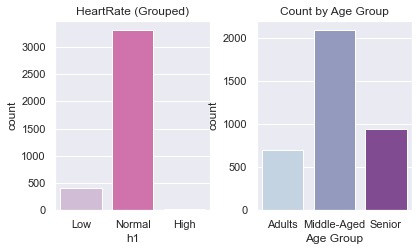

In [97]:
#HeartRate (Grouped) Count

plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(231)
sns.countplot(df['h1'], palette='PuRd')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(2,3,2)
sns.countplot(df['e1_age'],palette='BuPu')
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')



- We can observe that Subject with Normal HeartRate are in Majority followed by Resting / Low HeartRate and High HeartRate.-
- We've more number of Middle-Aged Adults in our Dataset followed by Seniors And then Adults.

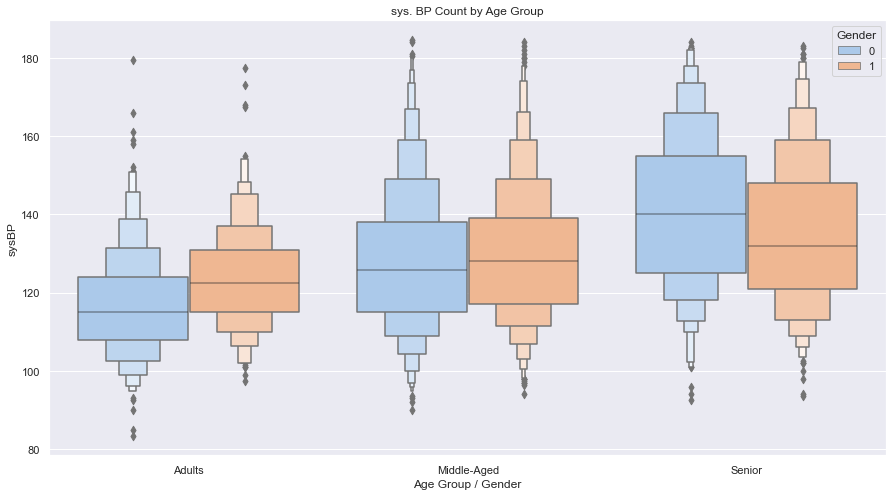

In [98]:

sns.boxenplot(x='e1_age', y='sysBP', hue='gender', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('sysBP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('sys. BP Count by Age Group')
plt.legend(title='Gender')

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning

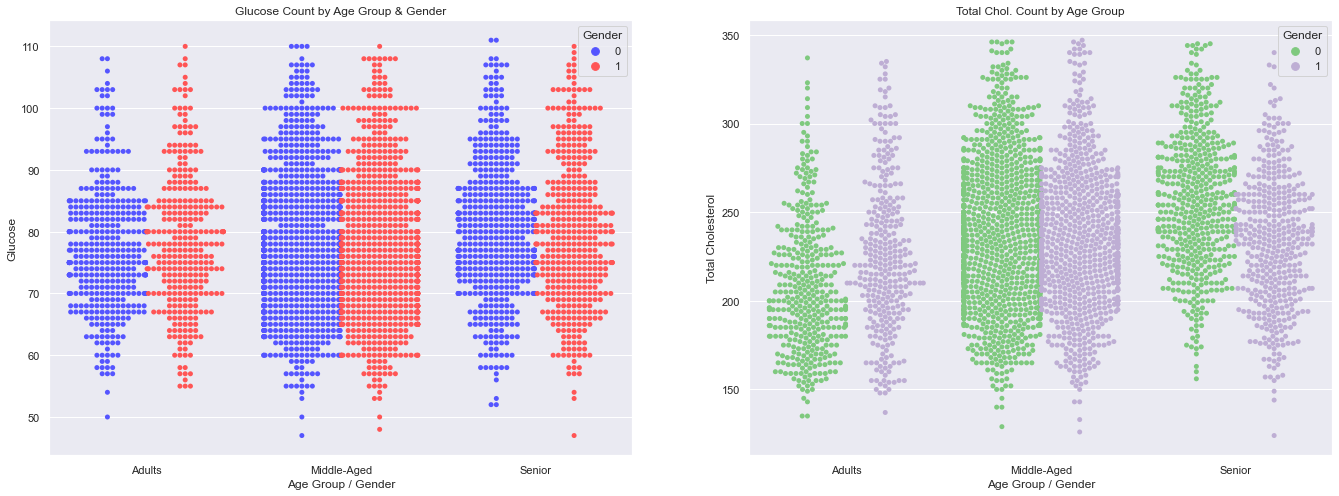

In [99]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.swarmplot(x='e1_age', y='glucose', hue='gender', data=df, palette='seismic', dodge=True)
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.swarmplot(x='e1_age', y='totChol', hue='gender', data=df, palette='Accent',dodge=True)
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Cigs. per day by Age Group')

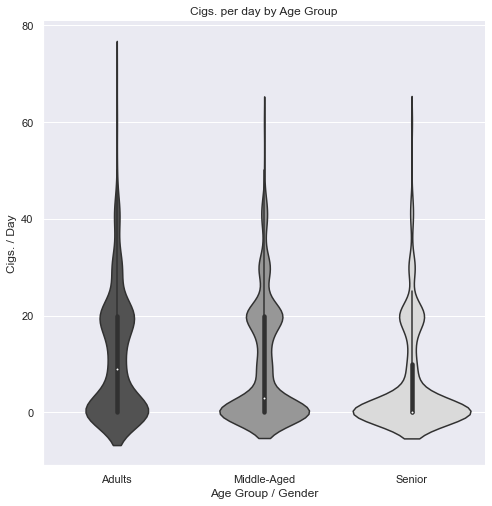

In [100]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='e1_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Diabetes by Age Group')

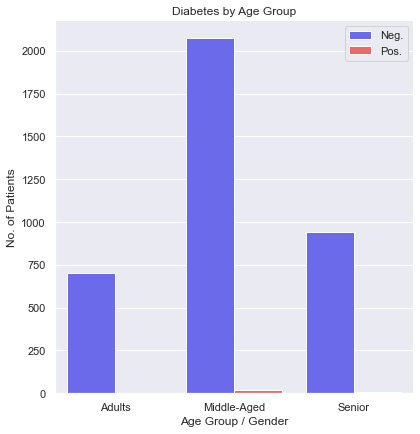

In [101]:
#Diabetes by Age Group

sns.catplot(x='e1_age', hue='diabetes', data=df, kind='count', palette='seismic', size=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

Text(0.5, 1.0, 'Ten Years of Heart Disease')

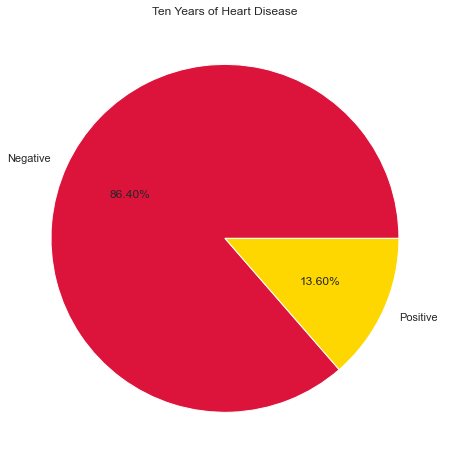

In [102]:
plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Negative','Positive'],autopct='%1.2f%%',   colors=['crimson','gold'])
plt.title('Ten Years of Heart Disease')

### 3.1. Prepare Data for Machine Learning

In [45]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [46]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df.drop(['TenYearCHD'], axis=1).index)  

In [47]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2806, 14), (936, 14), (2806,), (936,))

In [48]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)


In [49]:

score_lr= round(accuracy_score(y_test,log_pred)*100,2)
print("The accuray score achieved using Logistic Regression is:"+str(score_lr)+"%")

The accuray score achieved using Logistic Regression is:85.58%


In [50]:
confusion_matrix(log_pred,y_test)

array([[795, 133],
       [  2,   6]], dtype=int64)

In [51]:
print(classification_report(log_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       928
           1       0.04      0.75      0.08         8

    accuracy                           0.86       936
   macro avg       0.52      0.80      0.50       936
weighted avg       0.99      0.86      0.91       936



In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

In [53]:
predict_prob = log_reg.predict_proba(x_test)

In [54]:
positive_prob = predict_prob[:,1]

In [55]:
score = roc_auc_score(y_test,positive_prob)
score

0.7135571342173438

In [56]:
fpr,tpr,x = roc_curve(y_test,positive_prob)

In [57]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True positive Rate')

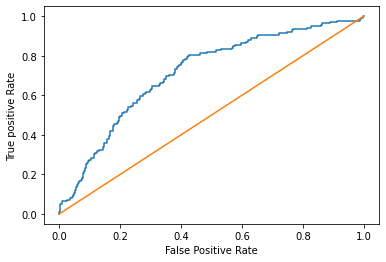

In [58]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing=1e-06)

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [60]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 84.72 %


In [61]:
confusion_matrix(Y_pred_nb,y_test)

array([[773, 119],
       [ 24,  20]], dtype=int64)

In [62]:
# SVM(Support vector Machine)

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)

In [63]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.83 %


In [64]:
from sklearn.neighbors import KNeighborsClassifier
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
score_knn = round(accuracy_score(y_test, knn_predict)*100,2)

print(" The Accuracy score achieved using  k-NN Classification is:"+str(score_knn)+"%")

 The Accuracy score achieved using  k-NN Classification is:78.74%


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0) 


In [67]:
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)

In [68]:
score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)
print("Accuracy score for Decision tree is:"+str(score_dt)+"%" )

Accuracy score for Decision tree is:83.01%


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)

In [71]:
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

In [72]:
score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)
print("Accuracy score for Random Forest is:"+str(score_rf)+"%")

Accuracy score for Random Forest is:85.15%


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(x_train,y_train)
gvc_predicted = gvc.predict(x_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
score_xgb =round(accuracy_score(y_test, gvc_predicted)*100,2)

print("Accuracy of Gradient Boosting Classifier is:"+str(score_xgb)+"%")


Accuracy of Gradient Boosting Classifier is:85.47%


In [74]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

In [75]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=14))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
88/88 [==============================] - 1s 3ms/step - loss: 0.8483 - accuracy: 0.3689
Epoch 2/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.6561
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8022
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8489
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8642
Epoch 6/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8678
Epoch 7/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8689
Epoch 8/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8685
Epoch 9/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8685
Epoch 10/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.8685
Epoch 11/

88/88 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8721
Epoch 84/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8731
Epoch 85/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8717
Epoch 86/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8728
Epoch 87/300
88/88 [==============================] - 0s 4ms/step - loss: 0.3349 - accuracy: 0.8717
Epoch 88/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8731
Epoch 89/300
88/88 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.8717
Epoch 90/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8721
Epoch 91/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8735
Epoch 92/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8742
Epoch 93/300


88/88 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8749
Epoch 165/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8746
Epoch 166/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8746
Epoch 167/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8746
Epoch 168/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8756
Epoch 169/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8749
Epoch 170/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8749
Epoch 171/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8742
Epoch 172/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8767
Epoch 173/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8753
Epoc

88/88 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8749
Epoch 246/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8756
Epoch 247/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8742
Epoch 248/300
88/88 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8760
Epoch 249/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8756
Epoch 250/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8746
Epoch 251/300
88/88 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8749
Epoch 252/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8760
Epoch 253/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8746
Epoch 254/300
88/88 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8760
Epoc

In [77]:
Y_pred_nn = model.predict(x_test)

30/30 [==============================] - 0s 3ms/step


In [78]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [79]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 84.83 %


In [80]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.58 %
The accuracy score achieved using Naive Bayes is: 84.72 %
The accuracy score achieved using Support Vector Machine is: 84.83 %
The accuracy score achieved using K-Nearest Neighbors is: 78.74 %
The accuracy score achieved using Decision Tree is: 83.01 %
The accuracy score achieved using Random Forest is: 85.15 %
The accuracy score achieved using XGBoost is: 85.47 %
The accuracy score achieved using Neural Network is: 84.83 %


C:\Users\Pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

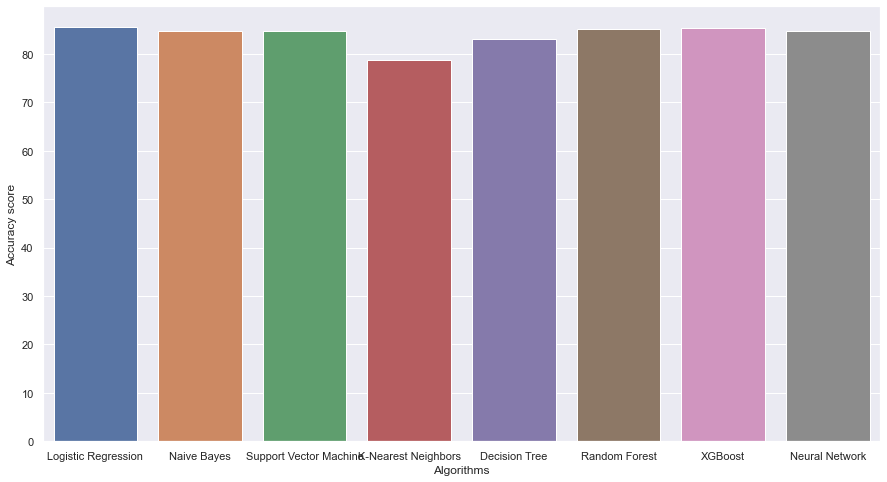

In [81]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [82]:
df.iloc[0]

gender               1.00
age                 39.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            195.00
sysBP              106.00
BMI                 26.97
heartRate           80.00
glucose             77.00
TenYearCHD           0.00
h1                   1.00
e1_age               0.00
Name: 0, dtype: float64

In [83]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)

gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, x_train, y_train, x_test, y_test)
    

In [84]:
#Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       797
           1       0.67      0.01      0.03       139

    accuracy                           0.85       936
   macro avg       0.76      0.51      0.47       936
weighted avg       0.83      0.85      0.79       936


confusion_matrix :
[[796   1]
 [137   2]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       797
           1       0.17      0.01      0.01       139

    accuracy                           0.85       936
   macro avg       0.51      0.50      0.47       936
weighted avg       0.75      0.85      0.78       936


confusion_matrix :
[[792   5]
 [138   1]]

-----

GradientBoostingClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       797
      

Feature: gender, Score: 0.06473
Feature: age, Score: 0.23195
Feature: cigsPerDay, Score: 0.09601
Feature: BPMeds, Score: 0.01225
Feature: prevalentStroke, Score: 0.00940
Feature: prevalentHyp, Score: 0.01020
Feature: diabetes, Score: 0.01334
Feature: totchol, Score: 0.13516
Feature: sysBP, Score: 0.16882
Feature: BMI, Score: 0.10599
Feature: heartRate, Score: 0.06016
Feature: glucose, Score: 0.07281
Feature: h1, Score: 0.00056
Feature: e1_age, Score: 0.01862


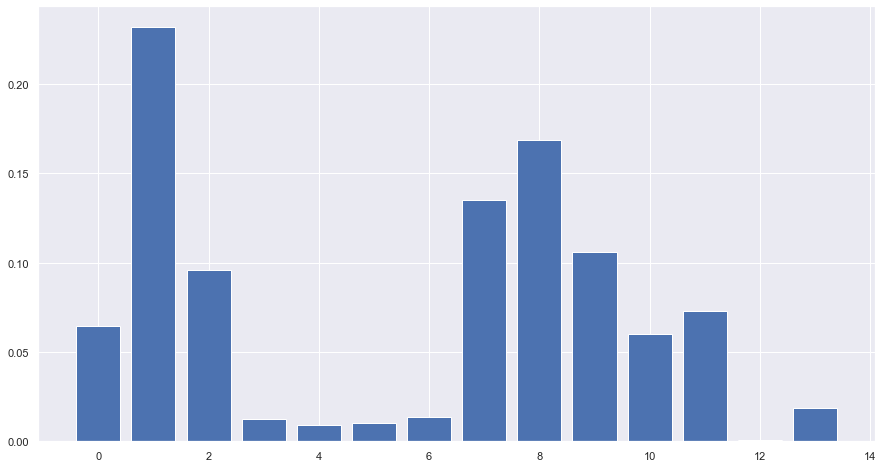

In [85]:
# get importance
features=['gender','age','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totchol','sysBP','BMI','heartRate','glucose','h1','e1_age']
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [86]:
with open('heart-model.pkl', 'wb') as file:
    pickle.dump(gb, file)